In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
from pytrends.request import TrendReq
import time
import pandas as pd
import matplotlib
import gtrends
from IPython.core.display import display, HTML
display(HTML('<h1>Relationship Between Google Trends and Stock Market<h1>'))

In [3]:
#Request trending data from google
pytrend = TrendReq(hl='en-US')
keyword2 = 'Covid-19 Vaccine'
start = '2019-01-01'
end = '2021-12-01'
geo='US'
cat=0
gprop=''

In [4]:
from pytrends import dailydata

#Covid-19 trend / can represent the seriouse level of pandemic
keyword3 = 'Covid-19'

start_d = datetime.strptime(start, '%Y-%m-%d')
end_d = datetime.strptime(end, '%Y-%m-%d')
s_year = start_d.year
s_mon = start_d.month
e_year = end_d.year
e_mon = end_d.month

dailydata2 = dailydata.get_daily_data(word= keyword3,
                 start_year= s_year,
                 start_mon= s_mon,
                 stop_year= e_year,
                 stop_mon= e_mon,
                 geo= geo,
                 verbose= False,
                 wait_time = 1.0)

<AxesSubplot:xlabel='date'>

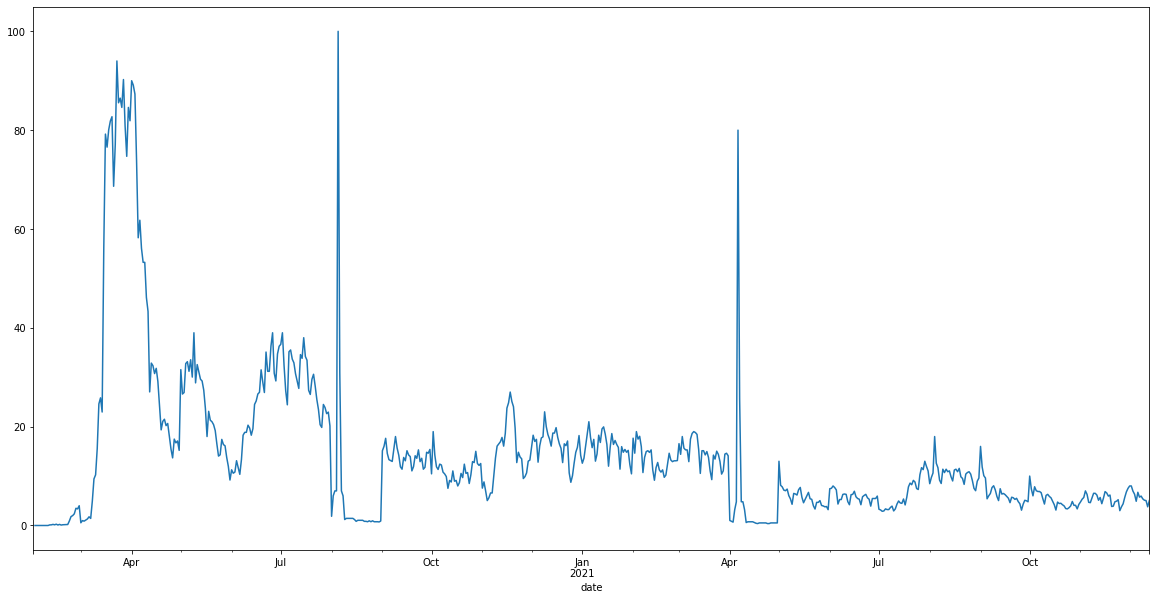

In [6]:
dailydata2[f'{keyword3}'].plot(figsize=(20,10))

In [7]:
#Covid-19 Vaccine Trend/ can represent the need of vaccine
from pytrends import dailydata

start_d = datetime.strptime(start, '%Y-%m-%d')
end_d = datetime.strptime(end, '%Y-%m-%d')
s_year = start_d.year
s_mon = start_d.month
e_year = end_d.year
e_mon = end_d.month

dailydata3 = dailydata.get_daily_data(word= keyword2,
                 start_year= s_year,
                 start_mon= s_mon,
                 stop_year= e_year,
                 stop_mon= e_mon,
                 geo= geo,
                 verbose= False,
                 wait_time = 1.0)

<AxesSubplot:xlabel='date'>

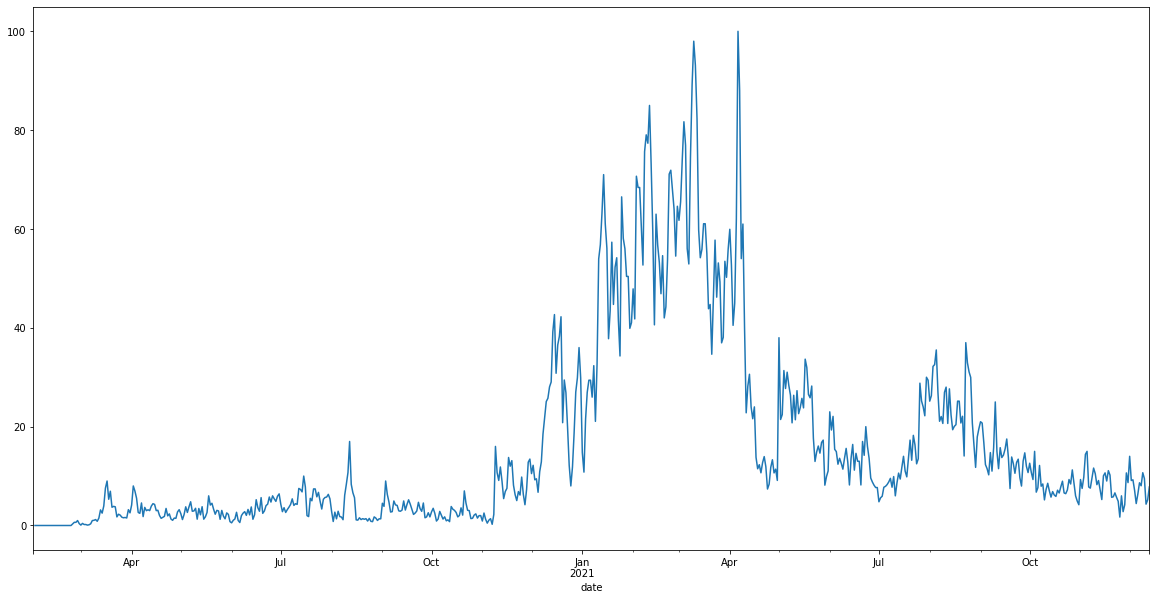

In [8]:
dailydata3[f'{keyword2}'].plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

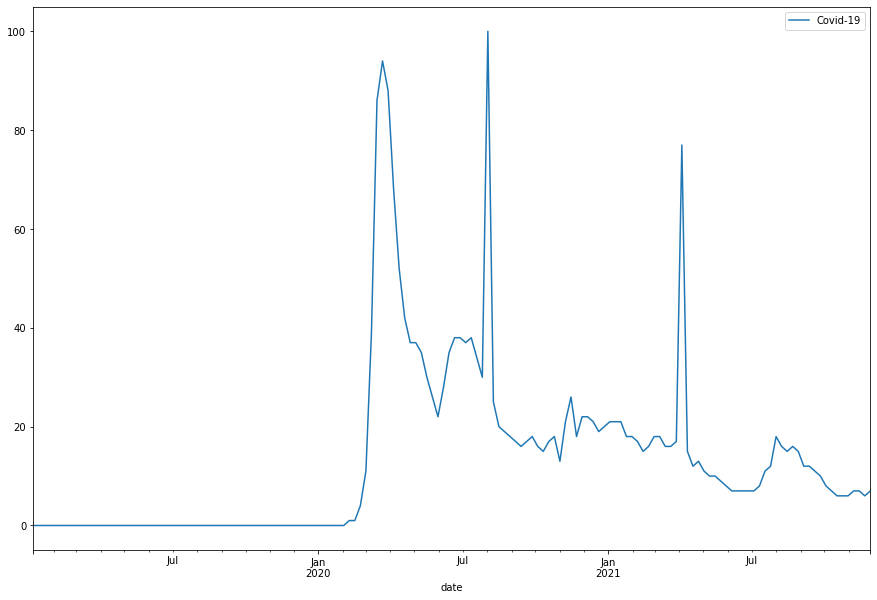

In [9]:
#Getting weekly trend
tf = start_d.strftime('%Y-%m-%d')+' '+end_d.strftime('%Y-%m-%d')
pytrend.build_payload(kw_list=[keyword3], cat=cat, geo=geo, gprop=gprop, timeframe=tf)
week1 = pytrend.interest_over_time()
week_interp1 = week1.resample('D').mean()
week_interp1[f'{keyword3}'] = week_interp1[f'{keyword3}'].interpolate()
week_interp1.drop(columns='isPartial', inplace=True)
week_interp1.plot(figsize=(15,10))

<AxesSubplot:xlabel='date'>

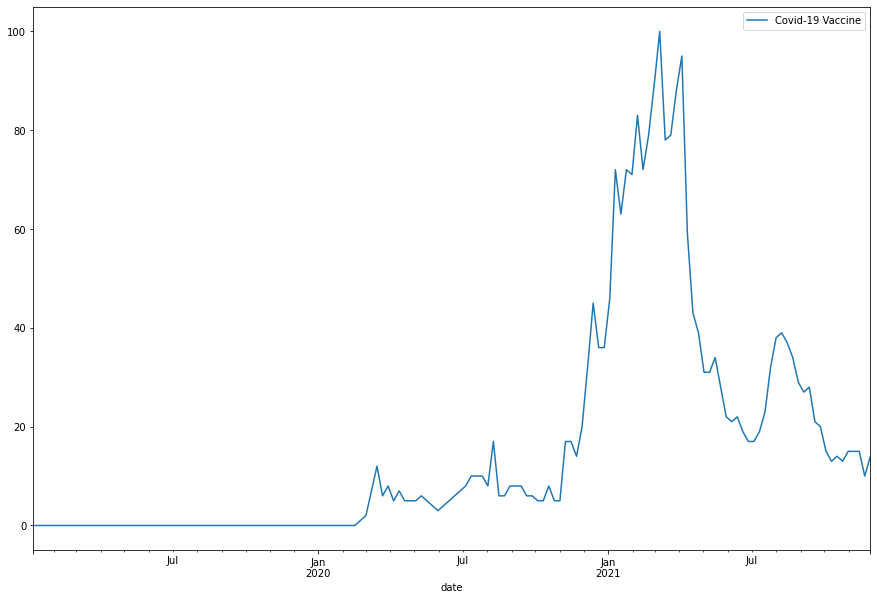

In [10]:
#Getting weekly trend
tf = start_d.strftime('%Y-%m-%d')+' '+end_d.strftime('%Y-%m-%d')
pytrend.build_payload(kw_list=[keyword2], cat=cat, geo=geo, gprop=gprop, timeframe=tf)
week2 = pytrend.interest_over_time()
week_interp2 = week2.resample('D').mean()
week_interp2[f'{keyword2}'] = week_interp2[f'{keyword2}'].interpolate()
week_interp2.drop(columns='isPartial', inplace=True)
week_interp2.plot(figsize=(15,10))

In [11]:
virus_trend = pd.concat([dailydata2.loc[:,keyword3], week_interp1],axis=1)
virus_trend.columns = ["Daily Trends","Weekly Trends"]
virus_trend.tail()

,Daily Trends,Weekly Trends
date,,
2021-12-09,5.39,NaN
2021-12-10,5.11,NaN
2021-12-11,5.04,NaN
2021-12-12,3.78,NaN
2021-12-13,5.04,NaN


In [12]:
vaccine_trend = pd.concat([dailydata3.loc[:,keyword2], week_interp2],axis=1)
vaccine_trend.columns = ["Daily Trends","Weekly Trends"]
vaccine_trend.tail(10)

,Daily Trends,Weekly Trends
date,,
2021-12-04,7.14,NaN
2021-12-05,4.44,NaN
2021-12-06,6.36,NaN
2021-12-07,8.64,NaN
2021-12-08,8.04,NaN
2021-12-09,10.68,NaN
2021-12-10,9.48,NaN
2021-12-11,4.32,NaN
2021-12-12,5.20,NaN


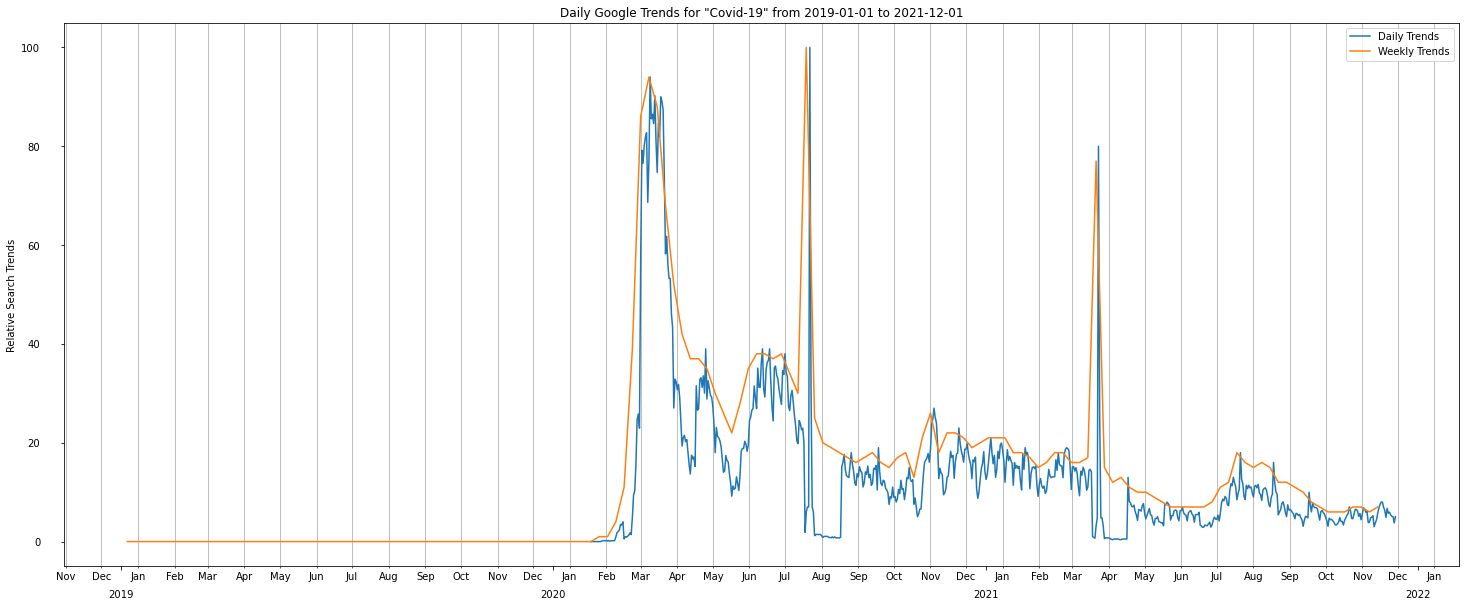

In [13]:
import matplotlib.dates as mdates
from cycler import cycler
from matplotlib.cm import get_cmap

combined2 = virus_trend
combined2.index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in combined2.index]

c = []
for i in range(0,4):
    c.append(matplotlib.colors.rgb2hex(plt.cm.tab10(i)))
ax = combined2.plot(figsize=(25,10), color=c)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax.tick_params(direction='out', pad=20)

ax.xaxis.grid(True, which='minor')

plt.ylabel('Relative Search Trends')

plt.title('Daily Google Trends for "Covid-19" from '+start+' to '+end)

plt.show()

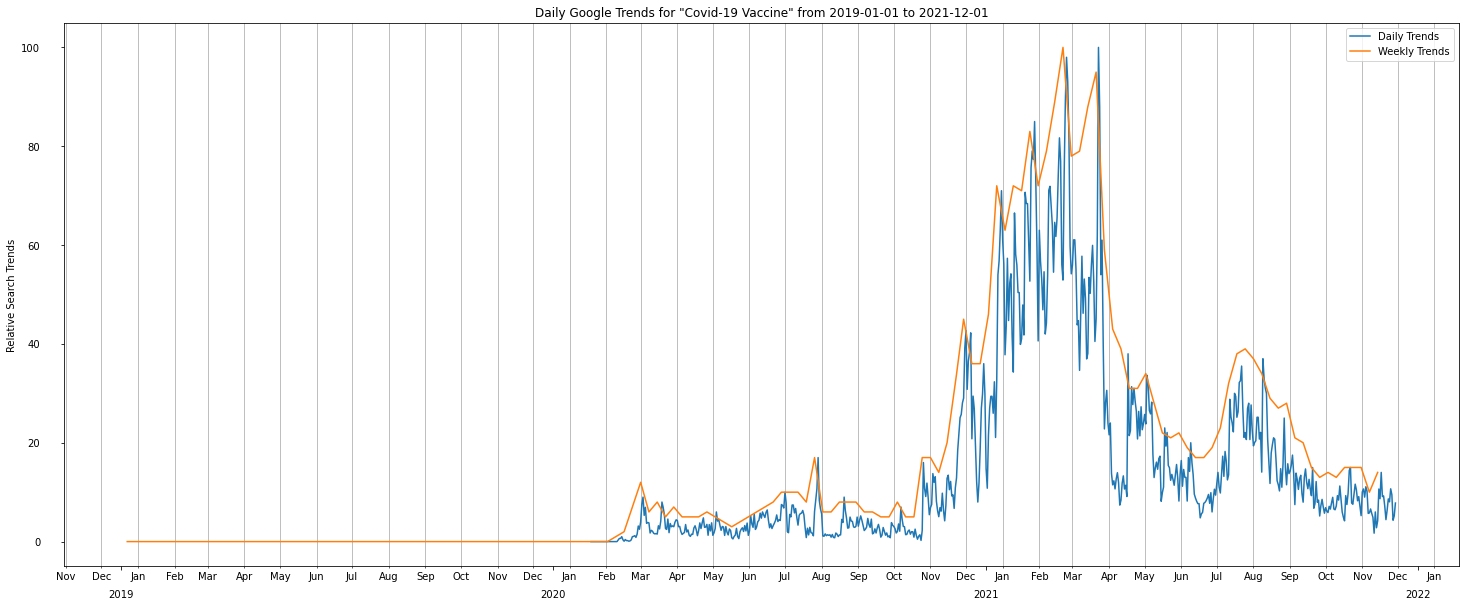

In [17]:

combined3 = vaccine_trend
combined3.index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in combined3.index]

c = []
for i in range(0,4):
    c.append(matplotlib.colors.rgb2hex(plt.cm.tab10(i)))
ax = combined3.plot(figsize=(25,10), color=c)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax.tick_params(direction='out', pad=20)

ax.xaxis.grid(True, which='minor')

plt.ylabel('Relative Search Trends')

plt.title('Daily Google Trends for "Covid-19 Vaccine" from '+start+' to '+end)

plt.show()

In [18]:
import yfinance as yf

cp = yf.Ticker("PFE")
cp1 = yf.Ticker("MRNA")
cp2 = yf.Ticker("BNTX")
cp3 = yf.Ticker("JNJ")
cp4 = yf.Ticker("AZN")
cp5 = yf.Ticker("NVAX")

pfe = cp.history(start=start, end=end)

mrna = cp1.history(start=start, end=end)

bntx = cp2.history(start=start, end=end)

jnj = cp3.history(start=start, end=end)

azn= cp4.history(start=start, end=end)

nvax = cp5.history(start=start, end=end)



In [19]:
bntx

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-10,16.500000,16.698999,13.010000,14.240000,2805800,0,0
2019-10-11,15.340000,15.340000,13.500000,13.820000,1364300,0,0
2019-10-14,13.830000,13.910000,12.525000,12.750000,899100,0,0
2019-10-15,12.990000,13.000000,12.530000,12.920000,484700,0,0
2019-10-16,13.200000,13.880000,12.610000,12.940000,524200,0,0
...,...,...,...,...,...,...,...
2021-11-23,308.200012,311.609985,291.589996,308.839996,4343100,0,0
2021-11-24,295.000000,306.820007,291.850006,304.760010,2393500,0,0
2021-11-26,337.429993,372.489990,335.035004,348.000000,11029000,0,0


In [23]:
vaccine_stocks = pd.concat([pfe.Close,bntx.Close,mrna.Close,jnj.Close,azn.Close,nvax.Close], axis=1)
vaccine_stocks.columns = ['PFizer','BioNTech','Moderna','Johnson & Johnson','AstraZeneca','Novavax']

In [24]:
vaccine_stocks.head()

,PFizer,BioNTech,Moderna,Johnson & Johnson,AstraZeneca,Novavax
Date,,,,,,
2019-01-02,38.492058,NaN,15.330000,117.985733,34.607979,39.400002
2019-01-03,37.415173,NaN,15.500000,116.110893,35.093224,40.799999
2019-01-04,38.269566,NaN,16.959999,118.059624,35.871437,42.799999
2019-01-07,38.474258,NaN,16.270000,117.302292,35.505219,45.200001
2019-01-08,38.652256,NaN,16.950001,120.026817,34.910107,46.000000


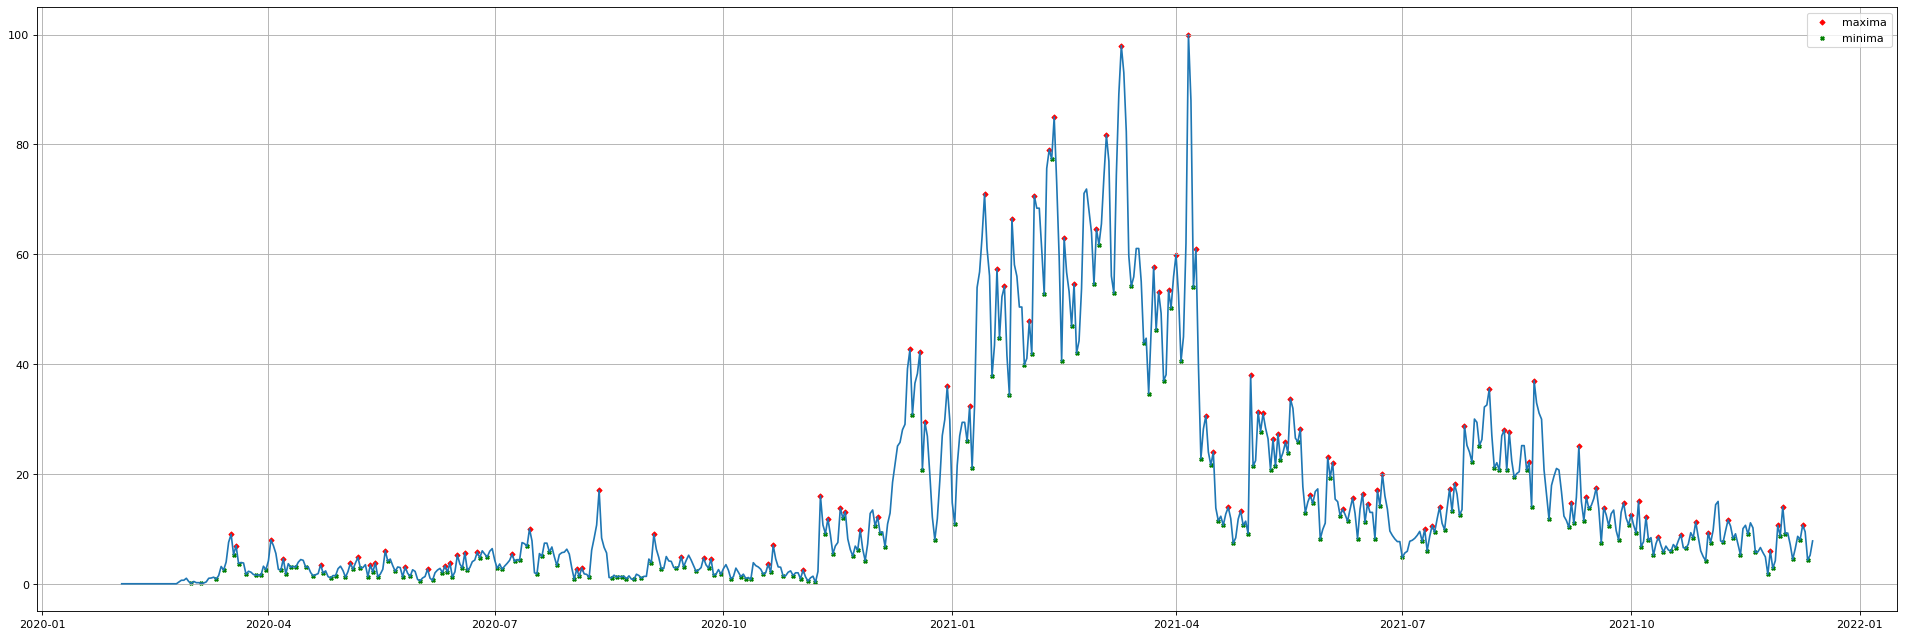

In [20]:
from scipy.signal import find_peaks
#defining the x and y arrays
x = vaccine_trend["Daily Trends"].index.values
y = vaccine_trend["Daily Trends"]
#Find peaks
peaks = find_peaks(y, height = 1, threshold = 1, distance = 1)
height = peaks[1]['peak_heights'] #list of the heights of the peaks
peak_pos = x[peaks[0]] #list of the peaks positions
#Finding the minima
y2 = y*-1
minima = find_peaks(y2)
min_pos = x[minima[0]] #list of the minima positions
min_height = y2[minima[0]] #list of the mirrored minima heights
#Plotting

fig = plt.figure(figsize=(30, 10), dpi=80)


ax = fig.subplots()
ax.plot(x,y)
ax.scatter(peak_pos, height, color = 'r', s = 10, marker = 'D', label = 'maxima')
ax.scatter(min_pos, min_height*-1, color = 'green', s = 10, marker = 'X', label = 'minima')
ax.legend()
ax.grid()
plt.show()

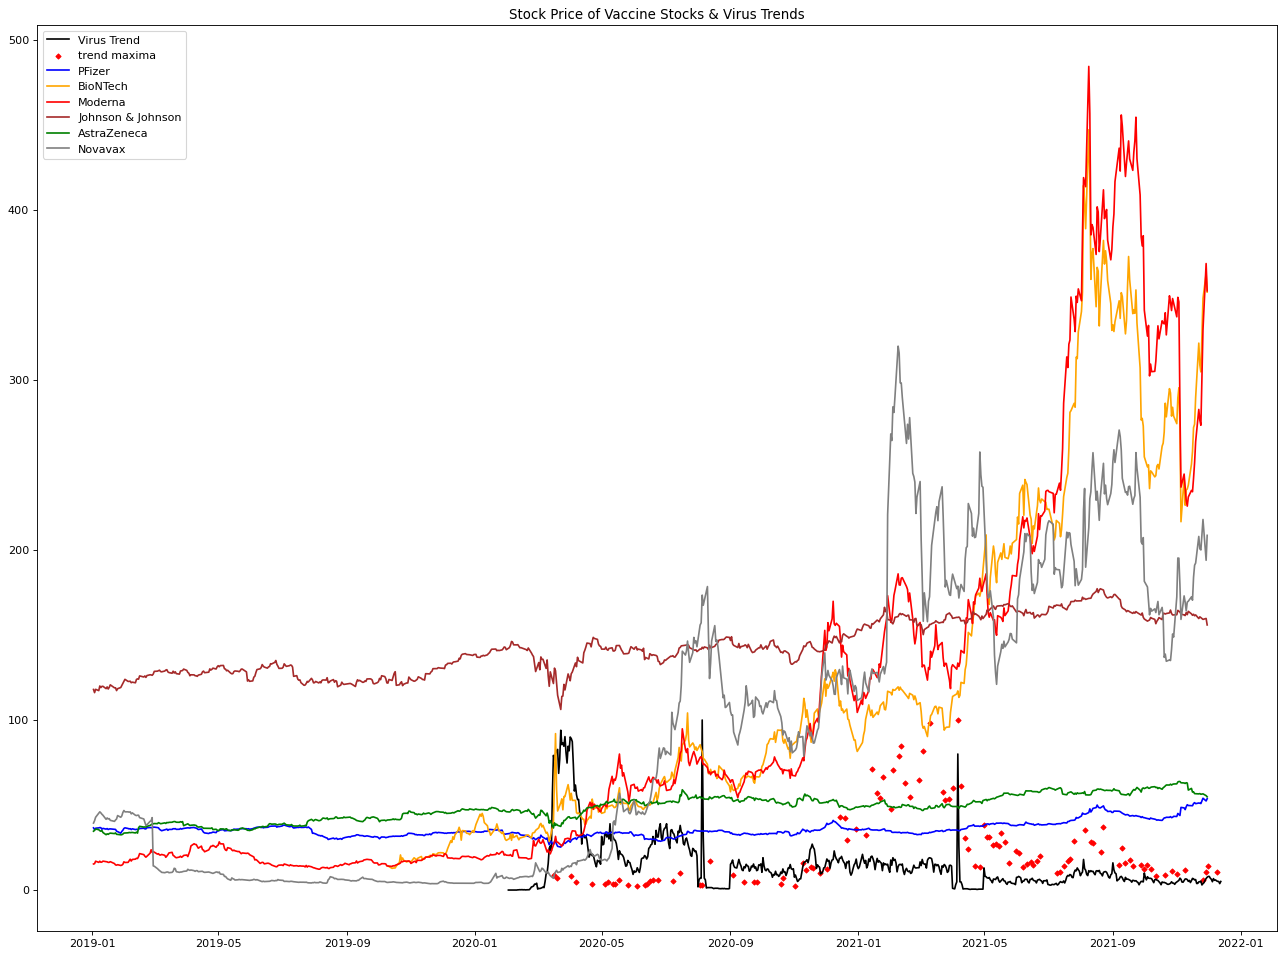

In [21]:
#Virus Trend/Stocks
plt.figure(figsize=(20,15),dpi=80)
plt.plot(virus_trend['Daily Trends'], color = 'black', label = 'Virus Trend')
plt.scatter(peak_pos, height, color = 'r', s = 10, marker = 'D', label = 'trend maxima')
plt.plot(pfe.Close, color = 'blue', label = 'PFizer')
plt.plot(bntx.Close, color = 'orange', label = 'BioNTech')
plt.plot(mrna.Close, color = 'red', label = 'Moderna')
plt.plot(jnj.Close, color = 'brown', label = 'Johnson & Johnson')
plt.plot(azn.Close, color = 'green', label = 'AstraZeneca')
plt.plot(nvax.Close, color = 'grey', label = 'Novavax')
plt.legend(loc = 'best')
plt.title('Stock Price of Vaccine Stocks & Virus Trends')
plt.show(block = False)


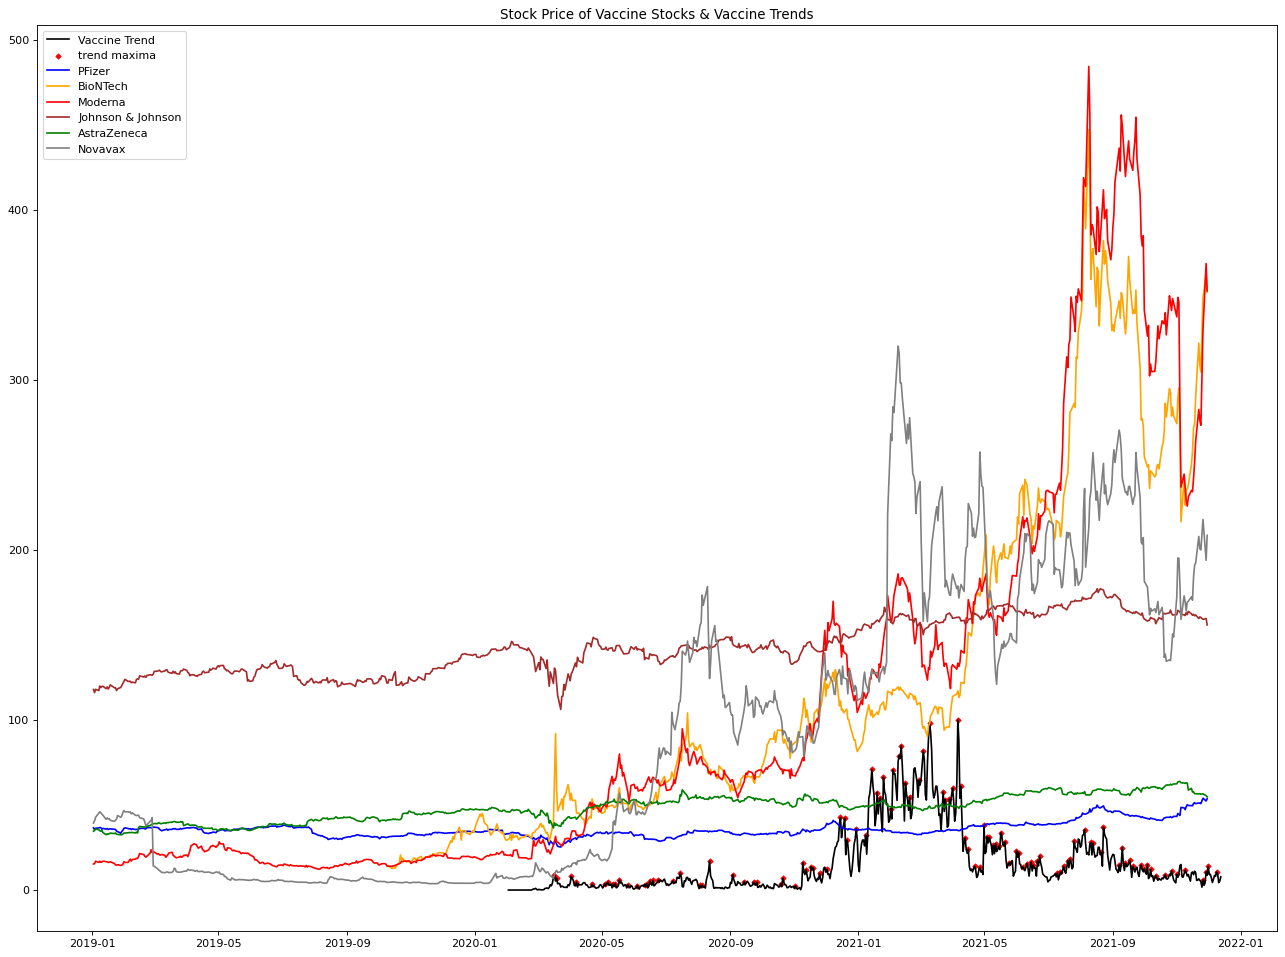

In [22]:
#Vaccine Trend/Stocks
plt.figure(figsize=(20,15),dpi=80)
plt.plot(vaccine_trend['Daily Trends'], color = 'black', label = 'Vaccine Trend')
plt.scatter(peak_pos, height, color = 'r', s = 10, marker = 'D', label = 'trend maxima')
plt.plot(pfe.Close, color = 'blue', label = 'PFizer')
plt.plot(bntx.Close, color = 'orange', label = 'BioNTech')
plt.plot(mrna.Close, color = 'red', label = 'Moderna')
plt.plot(jnj.Close, color = 'brown', label = 'Johnson & Johnson')
plt.plot(azn.Close, color = 'green', label = 'AstraZeneca')
plt.plot(nvax.Close, color = 'grey', label = 'Novavax')
plt.legend(loc = 'best')
plt.title('Stock Price of Vaccine Stocks & Vaccine Trends')
plt.show(block = False)


In [ ]:
#Visualization and EDA conclusion
#The Search trend of "Covid-19 Vaccine" clearly have a stronger realtion with vaccine stocks than the 
#trend of "Covid-19".
#Thus Vaccine_trend will be use for the rest of the project.

In [27]:
vaccine_trend_stocks = pd.concat([vaccine_trend['Daily Trends'],bntx.Close,mrna.Close,nvax.Close], axis=1)
vaccine_trend_stocks.columns = ["Vaccine Daily Trends",'BioNTech','Moderna','Novavax']
vaccine_trend_stocks.head()

,Vaccine Daily Trends,BioNTech,Moderna,Novavax
2019-01-02 00:00:00,NaN,NaN,15.330000,39.400002
2019-01-03 00:00:00,NaN,NaN,15.500000,40.799999
2019-01-04 00:00:00,NaN,NaN,16.959999,42.799999
2019-01-06,NaN,NaN,NaN,NaN
2019-01-07,NaN,NaN,16.270000,45.200001


/Users/wwy/opt/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/indexes/base.py:3512: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  indexer = self._engine.get_indexer(target._get_engine_target())


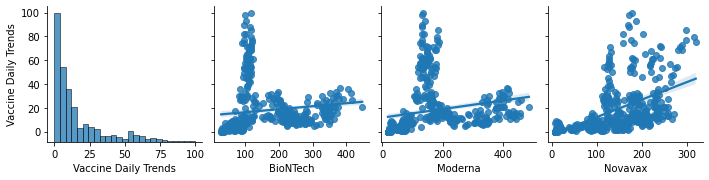

In [29]:
import seaborn as sns
sns.pairplot(vaccine_trend_stocks, y_vars = 'Vaccine Daily Trends',kind='reg')

<AxesSubplot:>

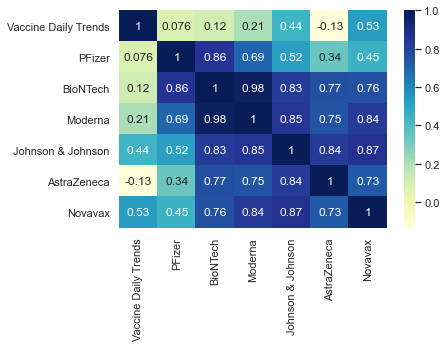

In [62]:
sns.heatmap(vaccine_trend_stocks.corr(),annot = True, cmap="YlGnBu")

In [ ]:
#From the pairplot and heatmap, I can easily conclude that the novavax have the strongest correlation to Vaccine Trend
#Next I will try to predict “novavax” stock price using arima model and lstm model using history stock price.
#after that I will add vaccine trend as a exogeouse factor to the model and compare the result.

In [57]:
%%html
<h1> Forecasting Vaccine Stock Using Time Series Analysis With ARIMA Model <h1>

In [40]:
pip install pmdarima

     |████████████████████████████████| 595 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 983 kB 30.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [41]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


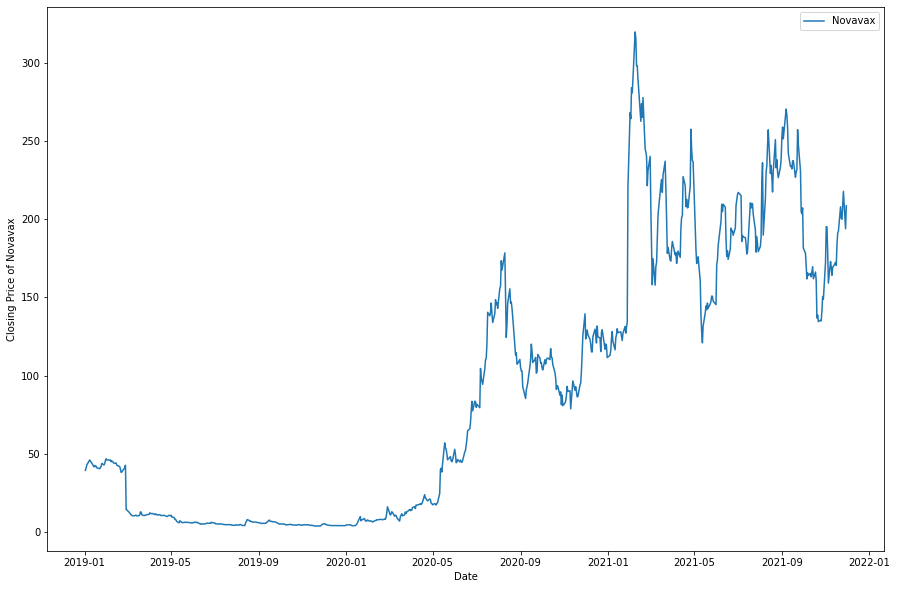

In [54]:
nvdata_1 = combine['Novavax']
nvdata.plot(figsize=(15,10))
plt.ylabel('Closing Price of Novavax')
plt.xlabel('Date')
plt.show()

<AxesSubplot:ylabel='Density'>

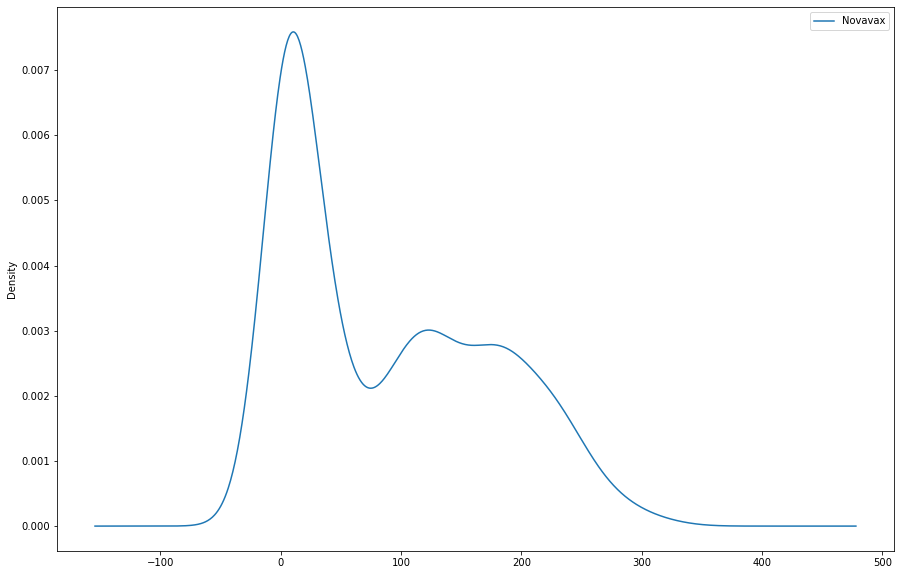

In [31]:
nvdata.plot(kind='kde',figsize=(15,10))

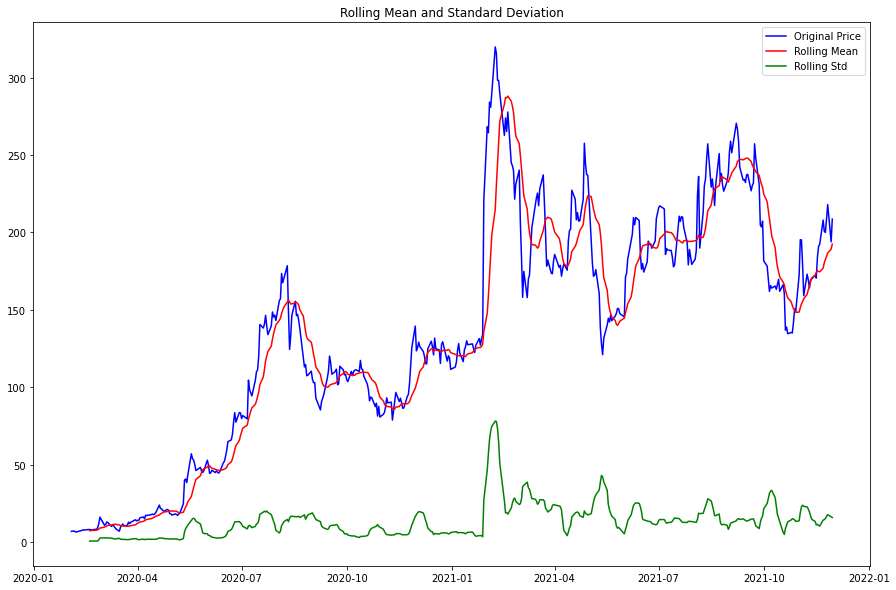

Results of dickey fuller test
Test Statistics                 -2.131991
p-value                          0.231847
No. of lags used                 3.000000
Number of observations used    458.000000
critical value (1%)             -3.444709
critical value (5%)             -2.867871
critical value (10%)            -2.570142
dtype: float64


In [55]:
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.figure(figsize=(15,10))
    plt.plot(timeseries, color='blue',label='Original Price')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='Green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    
    
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
    
test_stationarity(nvdata_1)

<Figure size 1080x576 with 0 Axes>

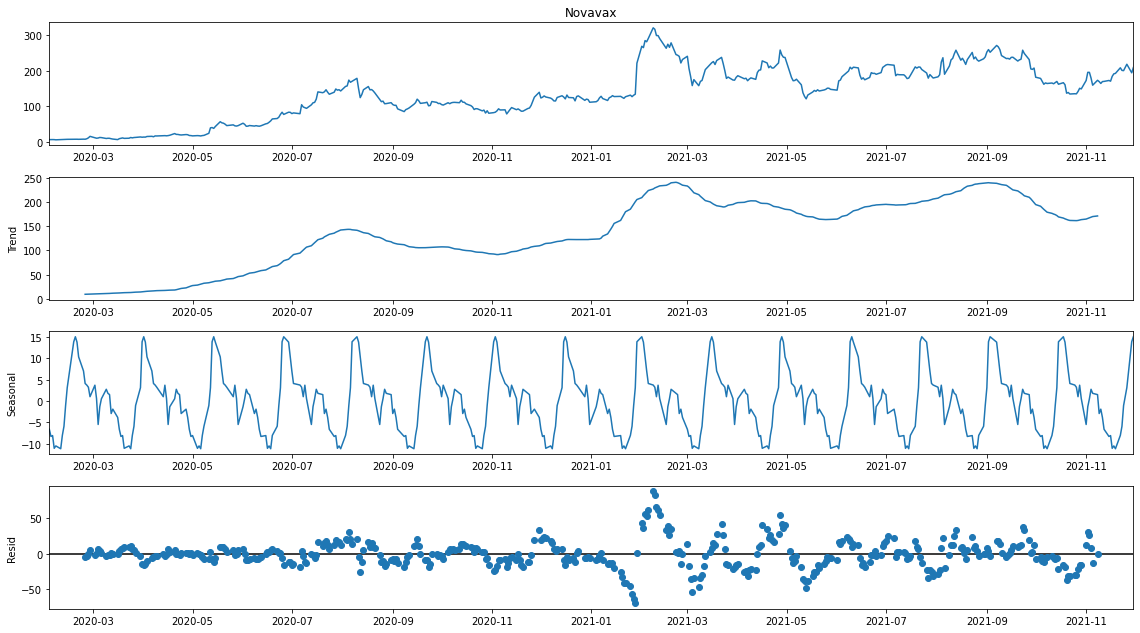

In [56]:
result = seasonal_decompose(nvdata_1, model='additive', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


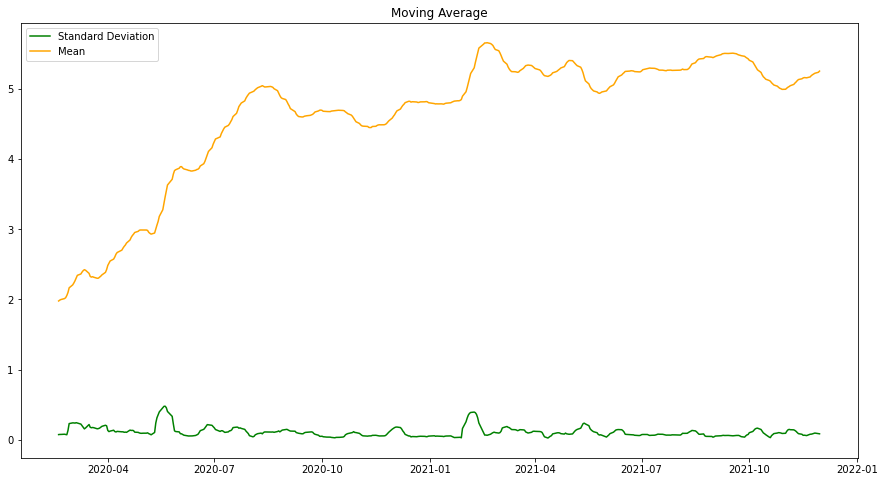

In [89]:
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
df_log_1 = np.log(nvdata_1)
moving_avg = df_log_1.rolling(12).mean()
std_dev = df_log_1.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="Green", label = "Standard Deviation")
plt.plot(moving_avg, color="Orange", label = "Mean")
plt.legend()
plt.show()

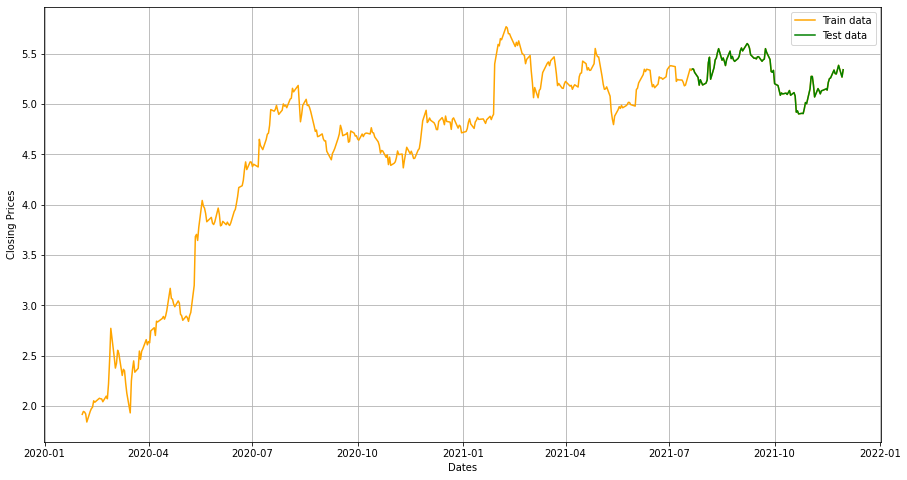

In [140]:
#split data into train and training set
train_data_1, test_data_1 = df_log_1[:int(len(df_log_1)*0.8)], df_log_1[int(len(df_log_1)*0.8):]

plt.figure(figsize=(15,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log_1, 'orange', label='Train data')
plt.plot(test_data_1, 'green', label='Test data')
plt.legend()

In [149]:
len(test_data_1)

93

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-770.465, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-774.968, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-775.908, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-768.051, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-774.331, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-774.626, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-772.738, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-774.525, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.539 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  369
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 390.954
Date:                Thu, 16 Dec 2021   AIC                           -775.908
Time:                        16:09:1

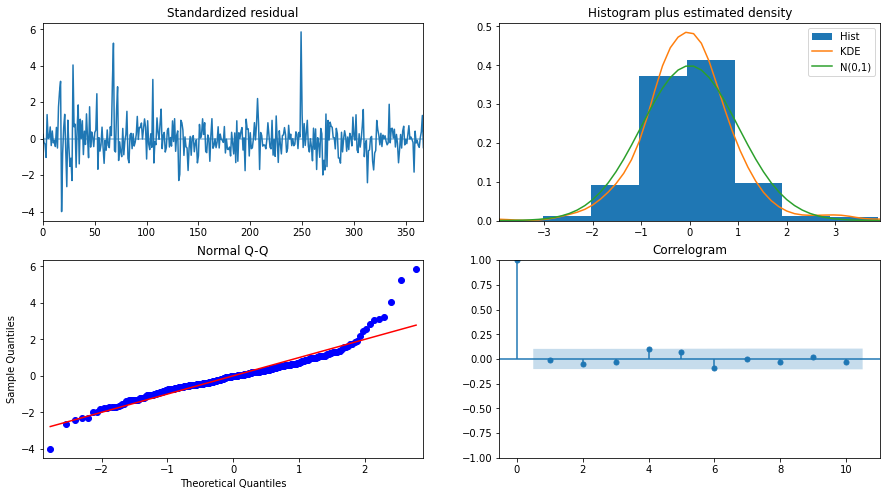

In [141]:
model_autoARIMA_1 = auto_arima(train_data_1, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA_1.summary())
model_autoARIMA_1.plot_diagnostics(figsize=(15,8))
plt.show()

In [142]:
#Modeling
# Build Model

model_1 = ARIMA(train_data_1, order=(0,1,1))  
fitted_1 = model_1.fit(disp=-1)  
print(fitted_1.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.Novavax   No. Observations:                  368
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 390.954
Method:                       css-mle   S.D. of innovations              0.084
Date:                Thu, 16 Dec 2021   AIC                           -775.908
Time:                        16:09:15   BIC                           -764.184
Sample:                             1   HQIC                          -771.250
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0093      0.005      1.850      0.064      -0.001       0.019
ma.L1.D.Novavax     0.1499      0.054      2.800      0.005       0.045       0.255
                                

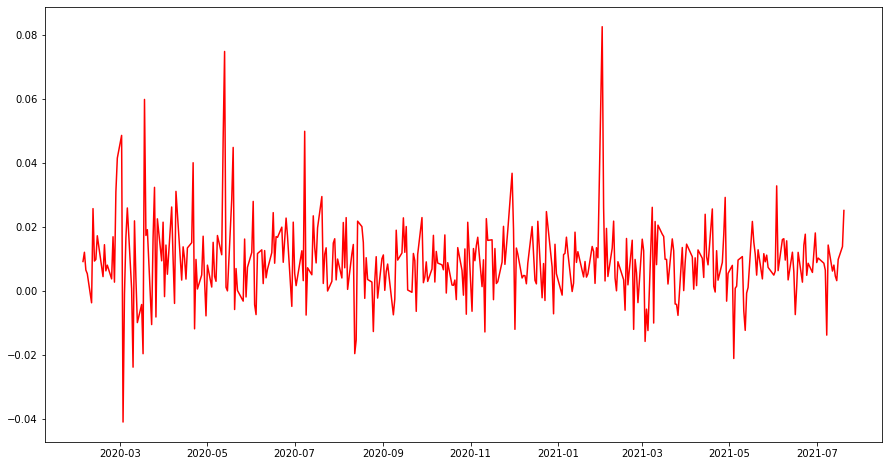

In [143]:
plt.plot(fitted_1.fittedvalues, color='red')


In [154]:
len(fc_1)

70

In [155]:
# Forecast
fc_1, se_1, conf_1 = fitted_1.forecast(93, alpha=0.05)  # 95% conf

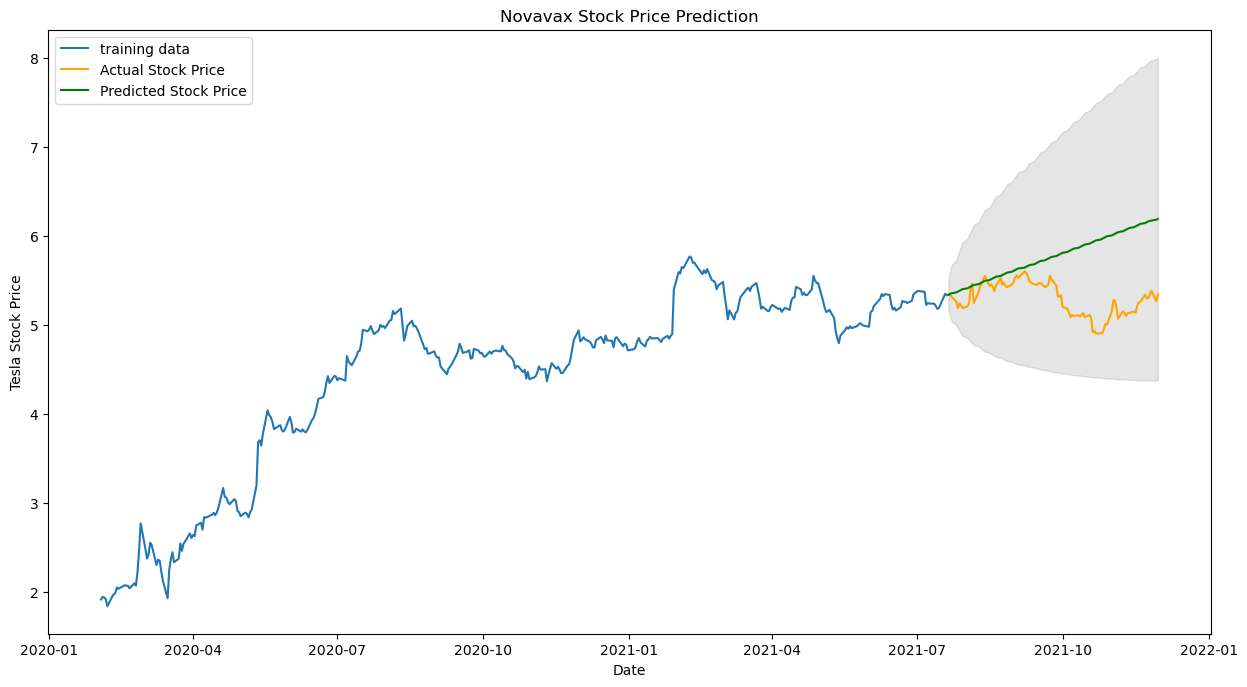

In [156]:
# Make as pandas series
fc_series_1 = pd.Series(fc_1, index = test_data_1.index)
lower_series_1 = pd.Series(conf_1[:, 0], index=test_data_1.index)
upper_series_1 = pd.Series(conf_1[:, 1], index=test_data_1.index)
# Plot
plt.figure(figsize=(15,8), dpi=100)
plt.plot(train_data_1, label='training data' )
plt.plot(test_data_1, color = 'Orange', label='Actual Stock Price')
plt.plot(fc_series_1, color = 'Green',label='Predicted Stock Price')
plt.fill_between(lower_series_1.index, lower_series_1, upper_series_1, 
                 color='k', alpha=.10)
plt.title('Novavax Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Tesla Stock Price')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [157]:
# report performance
mse = mean_squared_error(test_data_1, fc_1)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data_1, fc_1)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data_1, fc_1))
print('RMSE: '+str(rmse))
test_data = test_data.squeeze()
mape = np.mean(np.abs(fc_1 - test_data_1)/np.abs(test_data_1))
print('MAPE: '+str(mape))
MSE: 0.23407176848787753
MAE: 0.36480904233366396
RMSE: 0.4838096407554086
MAPE: 0.07080734115748963

MSE: 0.36462029484936476
MAE: 0.47600541716292577
RMSE: 0.6038379706919438
MAPE: 0.09208886290374381


In [91]:
%%html
#Lets try using google trends data as an exogeneous factor to the original ARIMA model.
<h1> ARIMAX Model, Google Trend added as Exogeneous Factor <h1>

In [50]:
vaccine_trend_stocks

,Vaccine Daily Trends,BioNTech,Moderna,Novavax
2019-01-02 00:00:00,NaN,NaN,15.330000,39.400002
2019-01-03 00:00:00,NaN,NaN,15.500000,40.799999
2019-01-04 00:00:00,NaN,NaN,16.959999,42.799999
2019-01-06,NaN,NaN,NaN,NaN
2019-01-07,NaN,NaN,16.270000,45.200001
...,...,...,...,...
2021-12-09,10.68,NaN,NaN,NaN
2021-12-10,9.48,NaN,NaN,NaN
2021-12-11,4.32,NaN,NaN,NaN
2021-12-12,5.20,NaN,NaN,NaN


In [52]:
combine = vaccine_trend_stocks[['Vaccine Daily Trends','Novavax']]

In [53]:
combine = combine.dropna()
combine

,Vaccine Daily Trends,Novavax
2020-02-03,0.00,6.810000
2020-02-04,0.00,7.010000
2020-02-05,0.00,6.970000
2020-02-06,0.00,6.840000
2020-02-07,0.00,6.310000
...,...,...
2021-11-23,5.70,200.710007
2021-11-24,4.90,200.070007
2021-11-26,6.00,217.970001
2021-11-29,10.64,193.960007


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


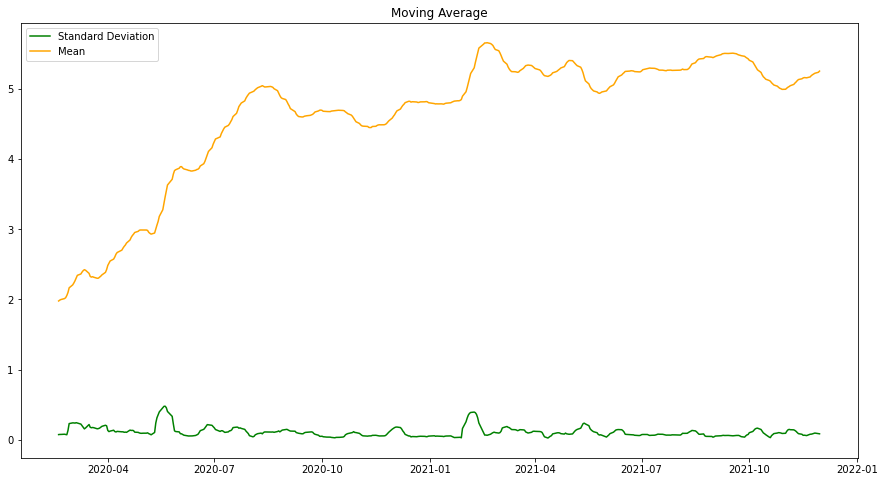

In [128]:
nvdata_2 = combine['Novavax']
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
df_log_2 = np.log(nvdata_2)
moving_avg = df_log_2.rolling(12).mean()
std_dev = df_log_2.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="Green", label = "Standard Deviation")
plt.plot(moving_avg, color="Orange", label = "Mean")
plt.legend()
plt.show()

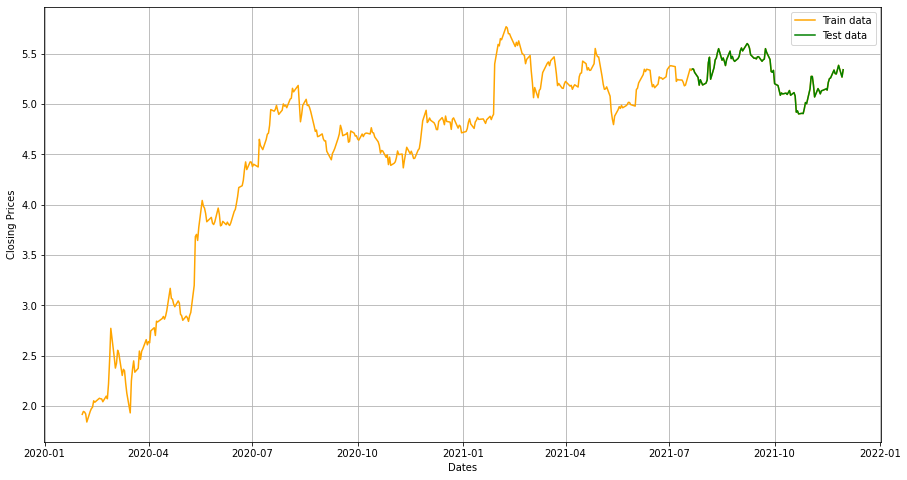

In [170]:
#split data into train and training set
train_data_2, test_data_2 = df_log_2[:int(len(df_log_2)*0.8)], df_log_2[int(len(df_log_2)*0.8):]
plt.figure(figsize=(15,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log_2, 'orange', label='Train data')
plt.plot(test_data_2, 'green', label='Test data')
plt.legend()

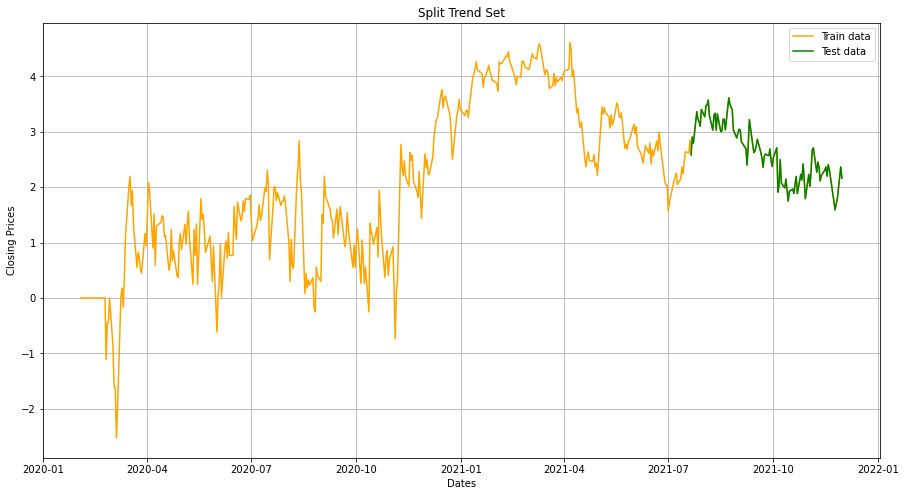

In [171]:
trend = combine['Vaccine Daily Trends']
tlog = np.log(trend).to_frame()
tlog = tlog.replace([np.inf, -np.inf], 0)

train_trend, test_trend = tlog[:int(len(tlog)*0.8)], tlog[int(len(tlog)*0.8):]
plt.figure(figsize=(15,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(tlog, 'orange', label='Train data')
plt.plot(test_trend, 'green', label='Test data')
plt.title("Split Trend Set")
plt.legend()

In [110]:
tlog

,Vaccine Daily Trends
2020-02-03,0.000000
2020-02-04,0.000000
2020-02-05,0.000000
2020-02-06,0.000000
2020-02-07,0.000000
...,...
2021-11-23,1.740466
2021-11-24,1.589235
2021-11-26,1.791759
2021-11-29,2.364620


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-770.465, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-774.968, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-775.908, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-768.051, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-774.331, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-774.626, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-772.738, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-774.525, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.538 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  369
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 390.954
Date:                Thu, 16 Dec 2021   AIC                           -775.908
Time:                        16:16:1

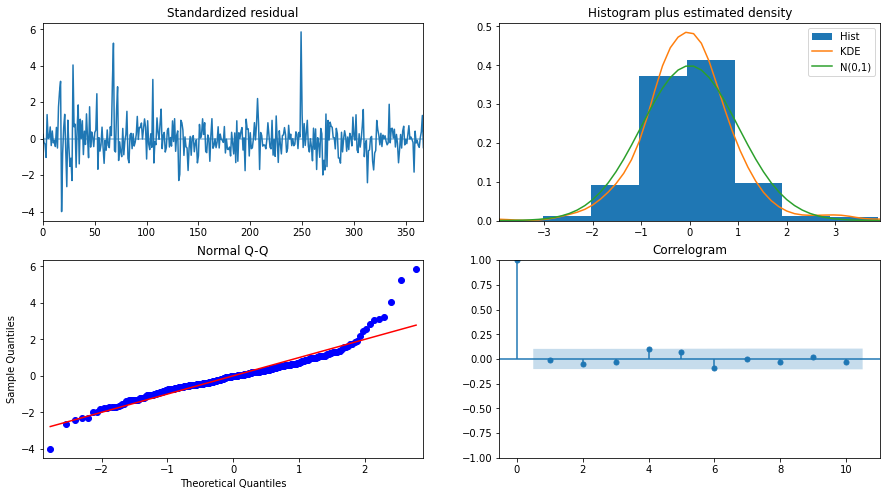

In [172]:
model_autoARIMA_2 = auto_arima(train_data_2, exog = train_trend, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA_2.summary())
model_autoARIMA_2.plot_diagnostics(figsize=(15,8))
plt.show()

In [173]:
#Modeling
# Build Model
model_2 = ARIMA(train_data_2, exog = train_trend ,order=(0,1,1))  
fitted_2 = model_2.fit(disp=-1)  
print(fitted_2.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.Novavax   No. Observations:                  368
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 391.362
Method:                       css-mle   S.D. of innovations              0.084
Date:                Thu, 16 Dec 2021   AIC                           -774.723
Time:                        16:16:17   BIC                           -759.091
Sample:                             1   HQIC                          -768.513
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0156      0.009      1.814      0.070      -0.001       0.032
Vaccine Daily Trends    -0.0031      0.003     -0.904      0.366      -0.010       0.004
ma.L1.D.Nova

In [175]:
len(test_trend)

93

In [176]:
#Forecast
fc_2, se_2, conf_2 = fitted_2.forecast(93,exog = test_trend , alpha=0.05)  # 95% conf

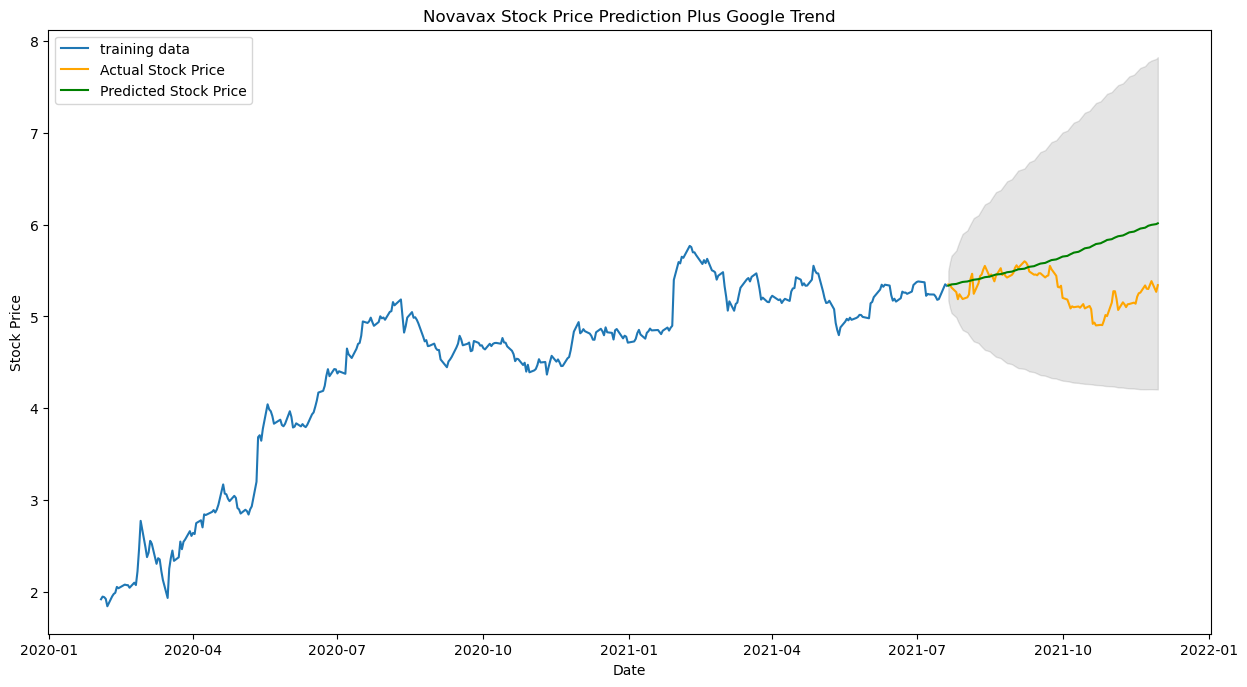

In [177]:
# Make as pandas series
fc_series_2 = pd.Series(fc_2, index = test_data_2.index)
lower_series_2 = pd.Series(conf_2[:, 0], index=test_data_2.index)
upper_series_2 = pd.Series(conf_2[:, 1], index=test_data_2.index)
# Plot
plt.figure(figsize=(15,8), dpi=100)
plt.plot(train_data_2, label='training data')
plt.plot(test_data_2, color = 'Orange', label='Actual Stock Price')
plt.plot(fc_series_2, color = 'Green',label='Predicted Stock Price')
plt.fill_between(lower_series_2.index, lower_series_2, upper_series_2, 
                 color='k', alpha=.10)
plt.title('Novavax Stock Price Prediction Plus Google Trend')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [178]:
# report performance
mse = mean_squared_error(test_data_2, fc_2)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data_2, fc_2)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data_2, fc_2))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc_2 - test_data_2)/np.abs(test_data_2))
print('MAPE: '+str(mape))


MSE: 0.23407176848787753
MAE: 0.36480904233366396
RMSE: 0.4838096407554086
MAPE: 0.07080734115748963


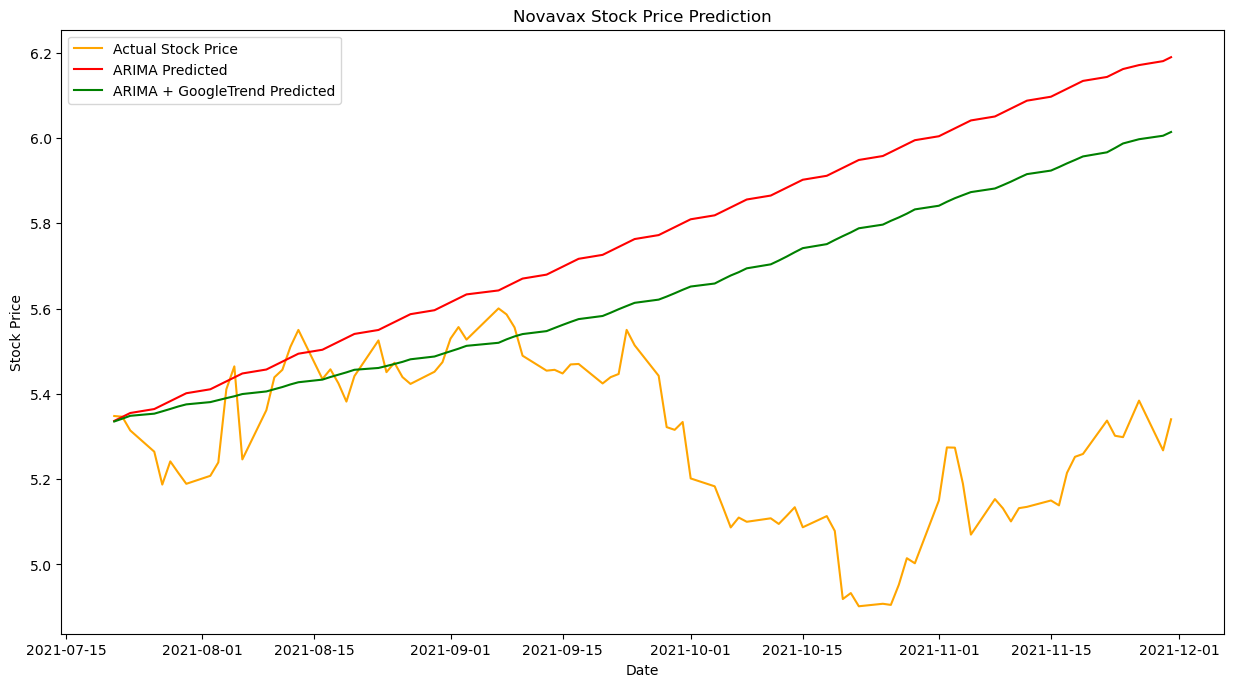

In [182]:
plt.figure(figsize=(15,8), dpi=100)

plt.plot(test_data_2, color = 'Orange', label='Actual Stock Price')
plt.plot(fc_series_1, color = 'red',label='ARIMA Predicted')
plt.plot(fc_series_2, color = 'Green',label='ARIMA + GoogleTrend Predicted')
plt.title('Novavax Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=10)
plt.show()